### Lab #6
## Introduction

You will learn about classification problems and how they can be approached using a category of tree-based models. In particular, you will use a decision tree from scikit-learn. You will see it in action with different datasets and understand its points of strength and weaknesses. Then, you will implement your own version of a random forest, starting from scikit-learn’s decision trees.

The main library you will need is scikit-learn. You can install it using pip.

In [1]:
import sys
!{sys.executable} -m pip install scikit-learn

## 1. Wine Dataset
### 1.1. Dataset download
The data is the result of a chemical analysis of wines grown in the same region in Italy, but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. From these 13 constituents (features), your goal is to predict the target class (the cultivars). You can download the dataset directly from scikit-learn.

In [2]:
from sklearn.datasets import load_wine

dataset = load_wine()
X = dataset['data']
y = dataset['target']
feature_names = dataset['feature_names']

### 1.2. Exercises
**1.** Based on your X and y, answerthe following questions:
- How many records are available?
- Are there missing values?
- How many elements does each class contain?

In [3]:
import pandas as pd
import numpy as np

In [4]:
print(X.shape) #178,13 numpy array
#178 records are available

(178, 13)


In [5]:
X.resize((13,178))
print(X.shape)
np.count_nonzero(X==None,axis=1)
#there is no missing values in any column

(13, 178)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [6]:
"""
from collections import Counter
Counter(y)
---or----
"""
{i:np.count_nonzero(y==i) for i in np.unique(y)}
#59 from class0, 71 from class1 and 48 from class2

{0: 59, 1: 71, 2: 48}

**2.** Create a DecisionTreeClassifier object with the default configuration (i.e. without passing any parameters to the constructor). Train the classifier using your X and y.


In [7]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [8]:
X.resize(X.T.shape)
clf.fit(X,y)

DecisionTreeClassifier()

**3.** Now that you have created a tree, you can visualize it. Sklearn offers two functions to visualize decision trees. The first one, plot_tree(), plots the tree in a matplotlib-based, interactive window. An alternative way is using export_graphviz(). This function exports the tree as a DOT file. DOT is a language for describing graph. From the DOT code, you can generate the resulting visual representation either using specific Python libraries, or by using any online tools (such as Webgraphviz)

<pre><code>
import pydot
from IPython.display import Image
from sklearn.tree import export_graphviz
clf = DecisionTreeClassifier(...)
...
#here, features is a list of names, one for each feature
#this makes the resulting tree visualization more comprehensible
dot_code = export_graphviz(clf, feature_names=features)
graph = pydot.graph_from_dot_data(dot_code)
Image(graph[0].create_png())
</code></pre>
After you successfully plotted a tree, you can take a closer look at the result and draw some conclusions. In particular, what information is contained in each node? Take a closer look at the leafnodes. Based on what you know about overfitting, what can you learn from these nodes?

-


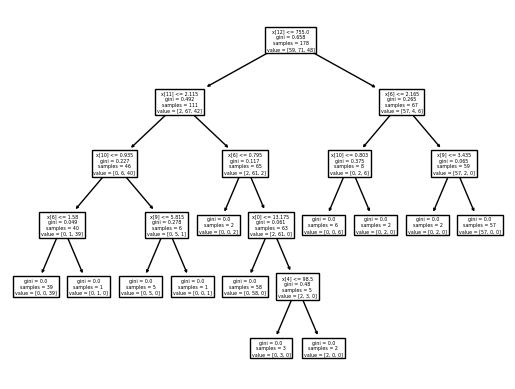

In [17]:
#1st way
from sklearn.tree import plot_tree
plot_tree(clf)
"""
#2nd way
#import sys
#!{sys.executable} -m conda install pydot

import pydot
from IPython.display import Image
from sklearn.tree import export_graphviz
clf = DecisionTreeClassifier()
clf.fit(X,y)

dot_code = export_graphviz(clf,feature_names=feature_names)
graph = pydot.graph_from_dot_data(dot_code)
a = graph[0]
Image(a.create_png())
"""
print("-")  #just to prevent information about plot_tree and comment block

Each node contain:
- "Attribute" to split (you can check the names with "feature_index") except the leaves since it is not necessary (they only contain 1 class at the same time)
- "GINI index" that shows the impurity of the node (max = 1-(1/N) where N is # of classes)
- "Samples" is sum of values for each class in this node
- "value" is the distribution of sample into each class

For overfitting, we can say that some nodes needs to stop splitting to prevent overfit. For example, if a node is perfectly splitted which means a leaf only contains a class' objects, this might cause overfitting. When a new data that is not in train dataset is tested, the model would be lack of generalization. As a result, we may stop the construct a new node when we reach a certain impurity to increase the generalization.

**4.** Given the dataset X, you can get the predictions of the classifier (one for each entry in X) by calling the predict() of DecisionTreeClassifier. Then, use the accuracy_score() function (which you can import from sklearn.metrics) to compute the accuracy between two lists of values (y_true, the list of “correct” labels, and y_pred, the list of predictions made by the classifier). Since you already have both these lists (y for the ground truth, and the result of the predict() method for the prediction), you can already compute the accuracy of your classifier. What result do you get? Does this result seem particularly high/low? Why do you think that is?


In [18]:
y_pred = clf.predict(X)
from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)
# this accuracy is expected because we tried to predict tha labels of the already trained data

1.0

**5.** Split our dataset into a training set and a test set. We will use the training set to train a model, and to assess its performance with the test set. Sklearn offers the train_test_split() function to split any number of arrays into two sets. You can use an 80/20 train/test split.


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,stratify=y)
#stratify is used the preserve the same distribution on y while splitting the data

**6.** Train a new model using (X_train, y_train). Then, compute the accuracy with (X_test, y_test). How does this value compare to the previously computed one? You can also compute other metrics (e.g. precision, recall, F1 score) using the respective functions (_precision_score_, _recall_score_, _f1_score_). Note that, since these three metrics are all based on a single class, you can either compute the value for a single class, aggregate the results into a single value, or receive the results for all three classes. Check the _average_ parameter on the documentation to learn more about this. You can also use the classification_report function, which returns various metrics (including the previously mentioned ones) for each of the classes of the problem.


In [20]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)
#the accuracy is not 1 since the classifier worked on different data than the tested one

1.0

In [21]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test, y_pred, average= None))
print(recall_score(y_test, y_pred,average=None))
print(f1_score(y_test, y_pred, average=None))

[[12  0  0]
 [ 0 14  0]
 [ 0  0 10]]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]


In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



**7.**  In this exercise, you will perform a “grid search”: you will define a set of possible configurations and, for each configuration, build a classifier. Then, you will test the performance of each classifier and identify that configuration that produces the best model.

On the official documentation for *DecisionTreeClassifier* you can find a list of all parameters you can modify. Identify some of the parameters that, based on your theoretical knowledge of decision trees, might affect the performance of the tree. For each of these parameters, define a set of possible values. Then, you can build a parameter dictionary.  Using the *ParameterGrid* class offered by scikit-learn, you can generate a list of all possible configurations that can be obtained from the parameter dictionary

In [59]:
from sklearn.model_selection import ParameterGrid

params = {
    "criterion": ["gini","entropy"],
    "splitter": ["best","random"],
    "max_depth": [None,3],
    "min_samples_split": [2,5],
    "min_impurity_decrease": [0.0, 0.05]
}

for param in ParameterGrid(params):
    clf = DecisionTreeClassifier(**param)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(f"{round(accuracy_score(y_test,y_pred),2)} -->",end=" ")
    print(f"{list(param.values())}")

# best parameters are criterion:gini , splitter:best , max_depth:[None,3],
# min_impurity_decrease: 0.0 , min_samples_split: 2

0.97 --> ['gini', None, 0.0, 2, 'best']
0.94 --> ['gini', None, 0.0, 2, 'random']
0.97 --> ['gini', None, 0.0, 5, 'best']
0.97 --> ['gini', None, 0.0, 5, 'random']
0.97 --> ['gini', None, 0.05, 2, 'best']
0.89 --> ['gini', None, 0.05, 2, 'random']
0.97 --> ['gini', None, 0.05, 5, 'best']
0.89 --> ['gini', None, 0.05, 5, 'random']
0.97 --> ['gini', 3, 0.0, 2, 'best']
0.83 --> ['gini', 3, 0.0, 2, 'random']
0.89 --> ['gini', 3, 0.0, 5, 'best']
0.94 --> ['gini', 3, 0.0, 5, 'random']
0.97 --> ['gini', 3, 0.05, 2, 'best']
0.94 --> ['gini', 3, 0.05, 2, 'random']
0.97 --> ['gini', 3, 0.05, 5, 'best']
0.86 --> ['gini', 3, 0.05, 5, 'random']
0.94 --> ['entropy', None, 0.0, 2, 'best']
0.94 --> ['entropy', None, 0.0, 2, 'random']
0.89 --> ['entropy', None, 0.0, 5, 'best']
0.92 --> ['entropy', None, 0.0, 5, 'random']
0.92 --> ['entropy', None, 0.05, 2, 'best']
0.86 --> ['entropy', None, 0.05, 2, 'random']
0.92 --> ['entropy', None, 0.05, 5, 'best']
0.94 --> ['entropy', None, 0.05, 5, 'random']
0.92

**8.** Typically, you do not want to use the test set for tuning the model’s hyperparameters, since the test set should only be used as a final evaluation. For this reason, datasets are typically splitted into
- Training set: used to create the model.
- Validation set: used to assess how good each configuration of a classifier is.
- Test set: used at the end of the hyperparameter tuning, to assess how good our final model is.

However, it often happens that only a limited amount of data is available. In these cases, cross-validation can be used to get rid of the validation set. One popular method of is the k-fold cross-validation. In this, the training set is split into k partitions. k − 1 are used for the training, the other one is used validation. This is repeated until all partitions have been used once for validation. Sklearn offers the *KFold* class for doing k-fold cross-validation.

For each fold, you can use the training data (i.e. X_train in the example above) to train each
classifier (i.e. decision trees with different configurations) and measure the performance on the validation data (i.e. X_valid). You can then aggregate the information extracted (e.g. by computing the overall accuracy from the accuracies on each fold) and select the best performing model. After you select one model, you can assess its performance on never-before-seen data (i.e. your test set)

In [63]:
from sklearn.model_selection import KFold
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X,y,test_size=.2, stratify=y)
kf = KFold(5)

accuracies = []
for param in ParameterGrid(params):
    clf_accuracies = []
    counts = []
    for train_indices, validation_indices in kf.split(X_train_valid):
        X_train = X_train_valid[train_indices]
        X_valid = X_train_valid[validation_indices]
        y_train = y_train_valid[train_indices]
        y_valid = y_train_valid[validation_indices]
        
        counts.append(len(train_indices))
        clf = DecisionTreeClassifier(**param)
        clf.fit(X_train,y_train)
        clf_accuracies.append(accuracy_score(y_valid, clf.predict(X_valid)))
    accuracies.append(np.average(clf_accuracies, weights=counts))

In [68]:
best_config = ParameterGrid(params)[np.argmax(accuracies)]
clf = DecisionTreeClassifier(**best_config)
clf.fit(X_train_valid,y_train_valid)
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.9166666666666666

## 2. Synthetic Dataset
### 2.1. Dataset download
This is a very simple 2d dataset that will help you understand some of the limitations of decision trees. It contains 2 synthetic features, each ranging from 0 to 10, and a target class (0 or 1).

You can download it from the following link as a CSV file.

https://raw.githubusercontent.com/dbdmg/data-science-lab/master/datasets/2d-synthetic.csv

### 2.2. Exercises
**1.** Load the synthetic dataset. Use matplotlib’s scatter() function to plot the dataset on a 2D plane and color the points based on their class label. How do you expect a decision tree to approach data distributed in this way?

In [56]:
import pandas as pd
df = pd.read_csv("2d_synthetic.csv")
df.shape

(500, 3)

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'x1')

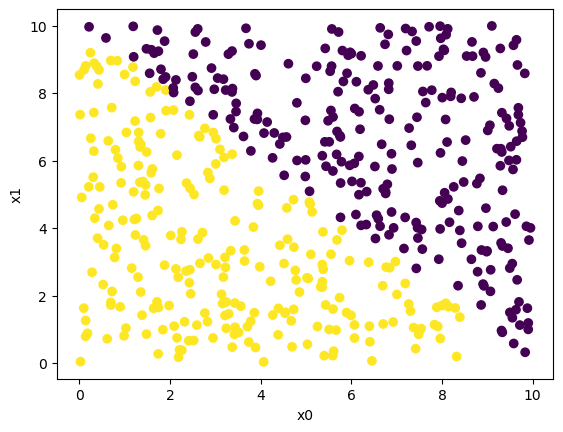

In [58]:
X = df.values[:,:2]
y = df.values[:,2].astype(int)
plt.scatter(X[:,0],X[:,1],c=y)
plt.xlabel("x0")
plt.ylabel("x1")
#decision tree always approach the data parpendicular to any one of the axis
#therefore, there will be many many split until the observations finished

**2.** Build a “default” decision tree using the entire dataset, then visualize the learned model. What is the tree learning, and why?

As we can see, although there is only 2 features, the tree is divided many times
The reason of it is that they have a diagonal linear line to sepereate,
but Decision Trees always seperate perpendicular for each attribute


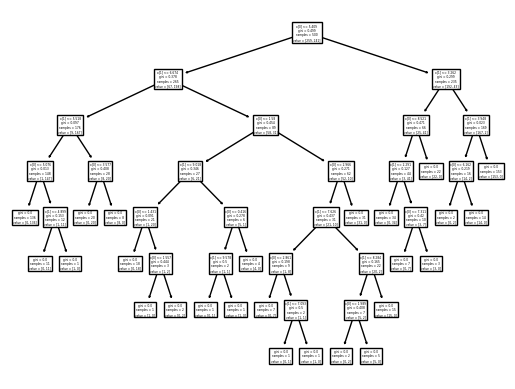

In [118]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf = DecisionTreeClassifier()
clf.fit(X,y)
plot_tree(clf)
print("As we can see, although there is only 2 features, the tree is divided many times")
print("The reason of it is that they have a diagonal linear line to sepereate,\n" 
      "but Decision Trees always seperate perpendicular for each attribute")

**3.** Identify a preprocessing step that would make the decision tree “correctly” approach this problem.

The best seperator for k value in x0+x1+k<0 is 10.033


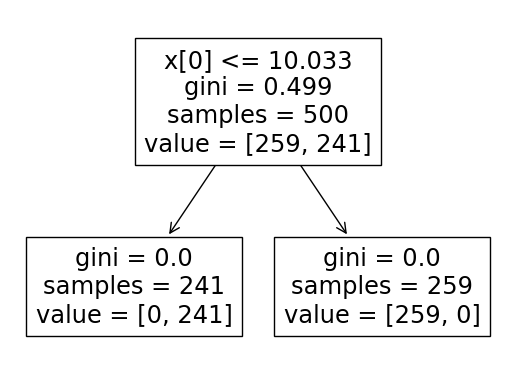

In [119]:
#It seems like it has a seperator like x0+x1+k<0 . Since the decision tree is better to find k,
#we will let it find to k by adding these two variable
X2 = (X[:, 0] + X[:, 1]).reshape(500,1)
clf2 = DecisionTreeClassifier()
clf2.fit(X2, y)
plot_tree(clf2)
print("The best seperator for k value in x0+x1+k<0 is 10.033")

## 3. MNIST Dataset
### 3.1. Dataset download
You can download the entire MNIST dataset either from the original source original source, or you can use sklearn’s fetch_openml function.

In [9]:
import warnings 
warnings.simplefilter("ignore",category=FutureWarning)
from sklearn.datasets import fetch_openml
import pandas as pd
dataset = fetch_openml("mnist_784")
X = dataset['data']
y = dataset['target']


### 3.2. Exercises
**1.** Divide the 70,000 digits you have into a training set (60,000 digits) and a test set (10,000 digits).

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/7,shuffle=True,stratify=y)

**2.** Train a single decision tree (with the default parameters) on the training set, then compute its accuracy on the test set.


In [38]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8756

**3.** Implement your own version of a random forest. A random forest is an ensemble approach: it trains multiple trees on different portions of the dataset. This lowers the chance of overfitting on the dataset.

Each tree, additionally, bases each split decision using a subset of all features. The size of this subset, B, is often selected to be the *square root of the total number of features available*, but different random forest may adopt different values. This parameter can be defined for each decision tree
through the *max_features* parameter. When building a tree, a random sample of *max_features* features will be extracted and used to select the split.

Another important parameter for random forests is the number of trees used. We will call this parameter n_estimators. During training, each of these trees (or estimators) is trained with its subset of data. During the prediction of a new list of points, each tree of the random forest will make its prediction. Then, through majority voting, the overall label assignment is made.

With these information about random forest, you can now implement your very own. The following is the structure your random forest should have.
```
class MyRandomForestClassifier():
    def __init__(self, n_estimators, max_features):
        pass

    # train the trees of this random forest using subsets of X (and y)
    def fit(self, X, y):
        pass
        
    # predict the label for each point in X
    def predict(self, X):
        pass
```


In [224]:
from scipy.stats import mode
import numpy as np
from collections import Counter

class MyRandomForestClassifier():
    def __init__(self, n_estimators=10, max_features='sqrt'): #{“sqrt”, “log2”, None}, int or float
        self.trees = [DecisionTreeClassifier(max_features=max_features)
                      for i in range(n_estimators)]
        
    # train the trees of this random forest using subsets of X (and y)
    def fit(self, X, y):
        for tree in self.trees:
            subset = np.random.choice(range(X.shape[0]),
                                      size=X.shape[0],
                                      replace=True)
            tree.fit(X.iloc[subset],y.iloc[subset])
    # predict the label for each point in X
    def predict(self, X):
        predictions = [tree.predict(X) for tree in self.trees]
        l = ([[ y[i] for y in predictions] for i in range(len(predictions[0])) ])
        return [Counter(i).most_common()[0][0] for i in l]

**4.** Now train your random forest with the 60,000 points of the training set and compute its accuracy against the test set. How does it compare to a decision tree? How does this performance vary as the number of estimators grow? Try values from 10 to 100 (with steps of 10) for n_estimators.

In [239]:
for i in np.linspace(10,100,10):
    clf = MyRandomForestClassifier(int(i))
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"For {i} estimators (tree) accuracy: {accuracy_score(y_test,y_pred)}")

For 10.0 estimators (tree) accuracy: 0.947
For 20.0 estimators (tree) accuracy: 0.9558
For 30.0 estimators (tree) accuracy: 0.9614
For 40.0 estimators (tree) accuracy: 0.9646
For 50.0 estimators (tree) accuracy: 0.9667
For 60.0 estimators (tree) accuracy: 0.9664
For 70.0 estimators (tree) accuracy: 0.968
For 80.0 estimators (tree) accuracy: 0.9677
For 90.0 estimators (tree) accuracy: 0.9673
For 100.0 estimators (tree) accuracy: 0.9661


The estimation accuracy is increased by 10% with random forest algorith we developed. This is a huge difference and the reason is simple: Instead of using only 1 decision tree, we used 10x decision trees. It shows how emsamble approach is powerfull

**5.** Scikit-learn implements its own version of a random forest classifier. Answer the same question as the previous exercise. How does your implementation of the random forest compare to sklearn’s?

In [244]:
from sklearn.ensemble import RandomForestClassifier
for i in np.linspace(10,100,10):
    clf = RandomForestClassifier(n_estimators=int(i))
    clf.fit(X_train,y_train)
    print(f"For {i} estimators (tree) accuracy: {accuracy_score(y_test,clf.predict(X_test))}")

For 10.0 estimators (tree) accuracy: 0.9426
For 20.0 estimators (tree) accuracy: 0.9604
For 30.0 estimators (tree) accuracy: 0.9629
For 40.0 estimators (tree) accuracy: 0.9647
For 50.0 estimators (tree) accuracy: 0.9659
For 60.0 estimators (tree) accuracy: 0.9661
For 70.0 estimators (tree) accuracy: 0.9678
For 80.0 estimators (tree) accuracy: 0.9682
For 90.0 estimators (tree) accuracy: 0.9681
For 100.0 estimators (tree) accuracy: 0.9669


This results is almost same with the one we developed